# Euler Bend

> optimizing a waveguide bend

In [ ]:
#| default_exp eulerbend


The question states:
> What’s the minimum bend radius for an euler bend for 400nm thick silicon for 1um wide waveguides at 1550nm for TE polarization. What’s the optimal radius and p parameter?

Let's first get an intuition for the modes supported by a 400nmx1um silicon waveguide

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
from skill_challenge.util import np, gf, gt, plt, nm

[3.11257216+0.j 2.92860407+0.j 2.82713475+0.j 2.69195954+0.j
 2.29838515+0.j 2.28191375+0.j 2.18429146+0.j 1.7294062 +0.j
 1.65737158+0.j 1.64125925+0.j 1.46231258+0.j 1.43783098+0.j]


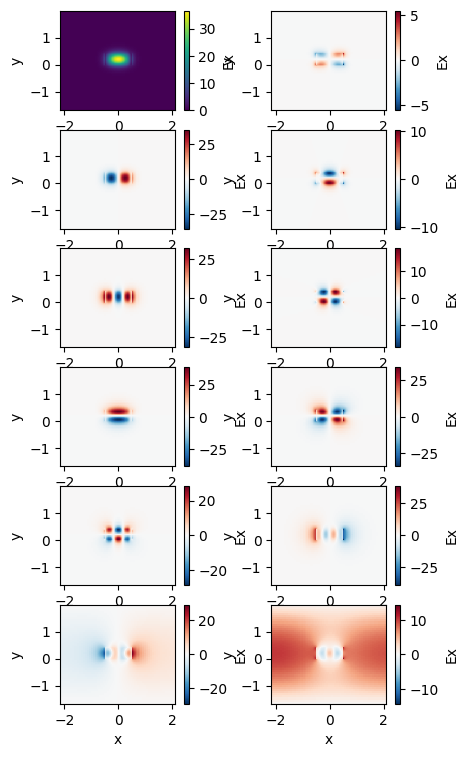

In [ ]:
num_modes = 12
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=400 * nm,
    num_modes=num_modes,
)

light_line = 1.44

fig, axs = plt.subplots(num_modes//2, 2, figsize=(5, 1.5*num_modes//2))
for m, ax in enumerate(axs.flatten()):
    strip.plot_field("Ex", mode_index=m, ax=ax)
print(strip.n_eff)

Note that the given waveguide geometry supports 11 modes. 5 of which are qTE.

To me the question is somewhat unclear. Therefore I will try to amend the question in the way I belive it was intended:

What’s the minimum bend radius for an euler bend for 400nm thick silicon for 1um wide waveguides at 1550nm for TE polarization, so that the fundamental mode has a transmission penalty of less then 0.01dB. What’s the optimal radius and p parameter to minimize that transmission penalty?


## Radiation Loss
Lets get an initial idea of the bend losses ignoring mode mismatch, mixing with higher order modes and propagation losses also present in straight waveguides (scattering etc.).


In [ ]:
rads = np.logspace(0.3, 2, 8)
n_eff = gt.modes.sweep_n_eff(strip, bend_radius = rads)

  0%|          | 0/8 [00:00<?, ?it/s]

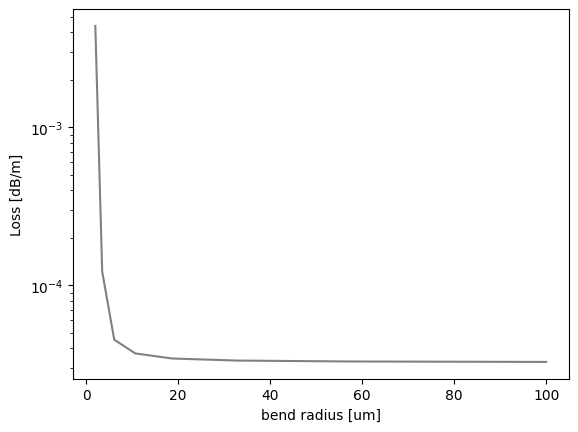

In [ ]:

y = np.array(n_eff.sel(mode_index=0).imag)
loss_db_pm = y * 4*np.pi*4.34/(1.55e-6) #Chrostowski p.69
plt.plot(rads, loss_db_pm, color="gray")
plt.ylabel("Loss [dB/m]")
plt.xlabel("bend radius [um]")
plt.yscale("log")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()